In [2]:
from deoldify import device
from deoldify.device_id import DeviceId
import matplotlib.pyplot as plt
import cv2
import numpy as np

device.set(device=DeviceId.GPU0)

import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")
colorizer = get_image_colorizer(artistic=True)



from transformers import pipeline
captioner = pipeline("image-to-text",model="Salesforce/blip-image-captioning-base")



Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


c:\Users\mohamed elsayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\mohamed elsayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\mohamed elsayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\utils\weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in fa

From c:\Users\mohamed elsayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\tf_keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.



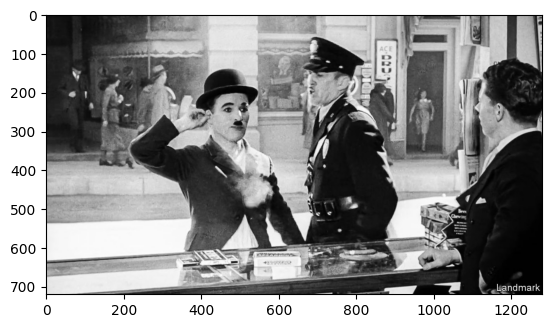

In [13]:
image_path = r"C:\Users\mohamed elsayed\Desktop\Necromancer\test cases\20231216_CUP501.jpg"
plt.imshow(cv2.imread(image_path)[:,:,::-1])

In [3]:
from PIL import Image, ImageDraw, ImageFont

img_colorized = colorizer.get_transformed_image(r"C:\Users\mohamed elsayed\Desktop\Necromancer\test cases\20231216_CUP501.jpg", render_factor=35, watermarked=False)
caption=captioner(r"C:\Users\mohamed elsayed\Desktop\Necromancer\test cases\20231216_CUP501.jpg")
draw = ImageDraw.Draw(img_colorized)

            # Get caption for the image (captioner not defined here)

# Add caption to the image with black background
draw = ImageDraw.Draw(img_colorized)
text = caption[0]["generated_text"]
font = ImageFont.truetype('arial.ttf', size=50)
text_width, text_height = draw.textbbox((0, 0), text, font=font)[2:]
image_width, image_height = img_colorized.size
text_x = (image_width - text_width) // 2
text_y = image_height - text_height - 20

# Calculate background rectangle dimensions
bg_left = text_x - 10
bg_top = text_y - 10
bg_right = text_x + text_width + 10
bg_bottom = text_y + text_height + 10

# Draw filled black rectangle for background
draw.rectangle([bg_left, bg_top, bg_right, bg_bottom], fill='black')

# Add text to the image
draw.text((text_x, text_y), text, font=font, fill='white')


c:\Users\mohamed elsayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\generation\utils.py:1141: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


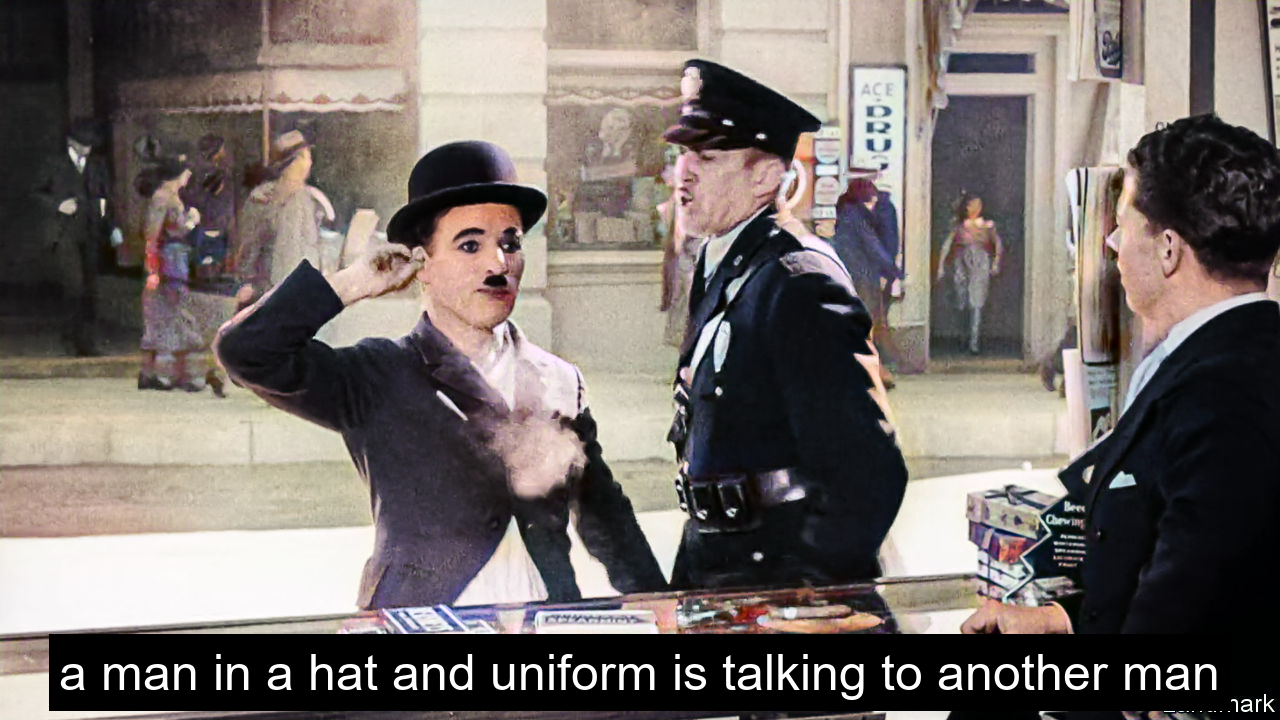

In [4]:
img_colorized